# DEEP LEARNING
### TOPIC : DOGS V/S CATS IMAGE CLASSIFICATION USING CNN, VGG-16 AND VGG-19

## PART 3 : USING ```VGG-19``` MODEL
### INTRODUCTION
This is a image classification project from our team. In this project, as part 2 we applied ```VGG-19``` for image classification.
The training archive contains 25,000 images of dogs and cats. Train the algorithm on these files and predict the labels
(1 = dog, 0 = cat).

### IMPORTING MODULES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
import os
import numpy as np
import pandas as pd
from keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.layers import  Dropout, Dense,GlobalMaxPooling2D
from keras.models import Model
from keras import optimizers
import warnings
warnings.filterwarnings('ignore')

### DOWNLOAD THE DATASET

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

### UNZIP THE DATASET

In [ ]:
!unzip kagglecatsanddogs_3367a.zip

In [ ]:
# For saving the resulting files in the drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### IMAGE AUGMENTATION, TRAIN AND TEST GENERATORS

In [ ]:
# Image dimensions
img_width = 150
img_height = 150
batch_size = 20
input_shape = (img_width, img_height, 3)

In [ ]:
# All images will be rescaled by 1./255. which is normalization
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    shear_range = 0.3,
    zoom_range = [0.6, 1.0],
    brightness_range = [0.6, 1.0],
    rotation_range = 90,
    horizontal_flip = True,
    validation_split = 0.2
)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(
    'PetImages',
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical',
    seed = 42,
    subset = 'training'
)
valid_generator = train_datagen.flow_from_directory(
    'PetImages',
    target_size = (img_width, img_height),
    batch_size = batch_size,
    #class_mode = 'binary',
    class_mode = 'categorical',
    seed = 42,
    subset = 'validation'
    
)
#X, y = next(train_generator)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


### MODEL CREATION OF VGG-19
#### BUILD NETWORK
The architecture of VGG-19 used in this project is shown as follow <br>

![VGG](https://mlfromscratch.com/content/images/2020/04/VGG19--1-.png)
<br>

In [ ]:
from keras.applications import VGG19 # The important module for VGG19 model
pre_trained_model = VGG19(input_shape = (150, 150, 3), include_top = False, weights = "imagenet")

for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
pre_trained_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation = 'relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
#x = Dense(1, activation='sigmoid')(x)
x = Dense(2, activation = 'softmax')(x)
model = Model(pre_trained_model.input, x)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer = optimizers.SGD(learning_rate = 1e-4, momentum = 0.9),
              metrics=['acc'])

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(monitor = 'val_loss', min_delta = 0.0001, patience = 20, verbose = 0, mode = 'auto')
callbacks = [earlystop]

### TRAINING THE MODEL

In [ ]:
history = model.fit(
            train_generator,
            validation_data = valid_generator,
            steps_per_epoch = 100,
            epochs = 25,
            validation_steps = 50,
            verbose = 1,
            callbacks = callbacks
            )

Epoch 1/25
100/100 [==============================] - 547s 5s/step - loss: 0.7139 - acc: 0.5580 - val_loss: 0.6559 - val_acc: 0.6490
Epoch 2/25
100/100 [==============================] - 346s 3s/step - loss: 0.6696 - acc: 0.6175 - val_loss: 0.6050 - val_acc: 0.6940
Epoch 3/25
100/100 [==============================] - 291s 3s/step - loss: 0.6176 - acc: 0.6735 - val_loss: 0.5853 - val_acc: 0.6940
Epoch 4/25
100/100 [==============================] - 271s 3s/step - loss: 0.5827 - acc: 0.7150 - val_loss: 0.5371 - val_acc: 0.7320
Epoch 5/25
100/100 [==============================] - 230s 2s/step - loss: 0.5481 - acc: 0.7290 - val_loss: 0.4866 - val_acc: 0.7800
Epoch 6/25
100/100 [==============================] - 219s 2s/step - loss: 0.5046 - acc: 0.7645 - val_loss: 0.4795 - val_acc: 0.7740
Epoch 7/25
100/100 [==============================] - 193s 2s/step - loss: 0.4618 - acc: 0.7870 - val_loss: 0.4191 - val_acc: 0.8190
Epoch 8/25
100/100 [==============================] - 172s 2s/step - 

### GRAPHS AND OTHER STATISTICS

Text(0.5, 1.0, 'Training and validation loss')

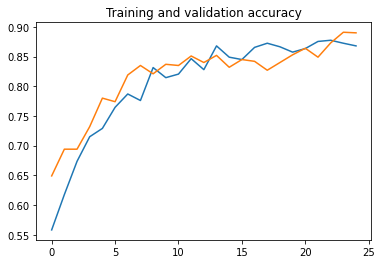

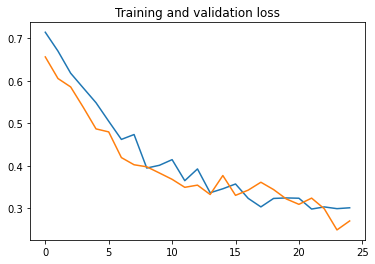

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

# ------------------------------------------------
# Plot training and validation loss per epoch
# ------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss')

In [ ]:
# Save the model
from keras.models import load_model
model.save('VGG19_MODEL.h5')
model.save_weights('VGG19_MODEL_WEIGHTS.h5')

In [ ]:
import keras
new_model = keras.models.load_model('VGG19_MODEL.h5')

In [ ]:
val_loss, val_acc = model.evaluate(valid_generator)  # Evaluate the out of sample data with model
#print(val_loss)  # Model's loss (error)

250/250 [==============================] - 54s 216ms/step - loss: 0.2873 - acc: 0.8770


In [ ]:
print(val_acc)  # Model's accuracy

0.8769999742507935


### TESTING RANDOM IMAGES WITH THE TRAINED MODEL

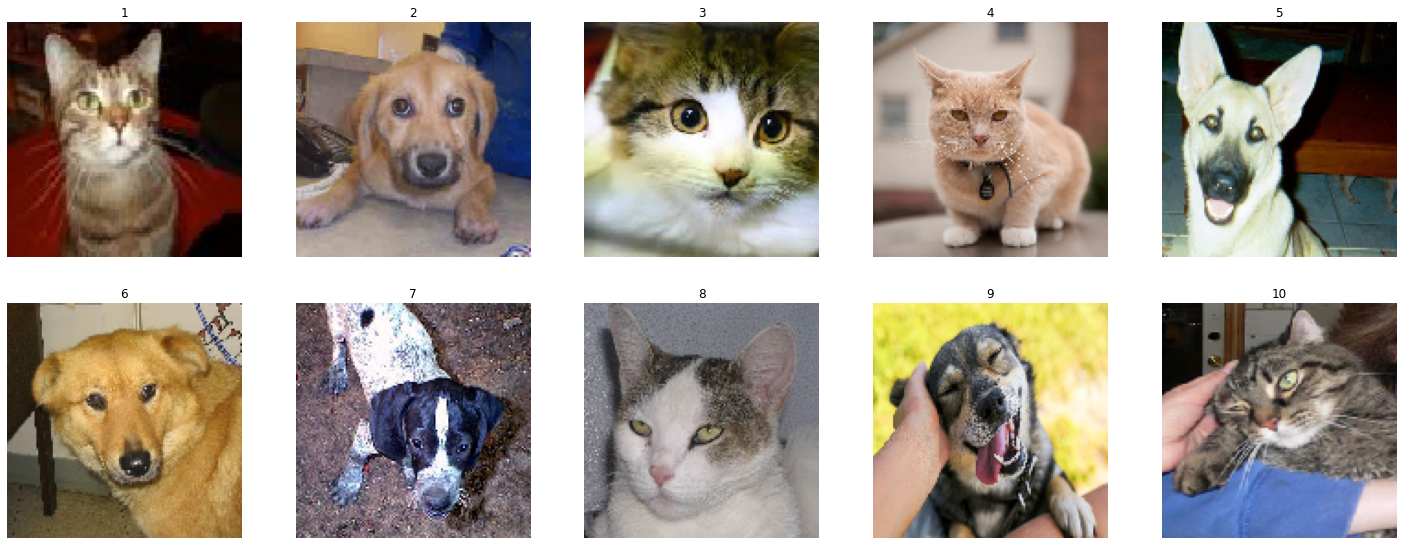

1/1 [==============================] - 1s 814ms/step
1


,Cat,Dog
0,0.999992,0.000008


1/1 [==============================] - 1s 502ms/step
2


,Cat,Dog
0,2.341561e-09,1.0


1/1 [==============================] - 1s 503ms/step
3


,Cat,Dog
0,0.999989,0.000011


1/1 [==============================] - 1s 521ms/step
4


,Cat,Dog
0,0.999995,0.000005


1/1 [==============================] - 0s 488ms/step
5


,Cat,Dog
0,0.504101,0.495899


1/1 [==============================] - 1s 515ms/step
6


,Cat,Dog
0,2.787419e-07,1.0


1/1 [==============================] - 0s 500ms/step
7


,Cat,Dog
0,0.000002,0.999998


1/1 [==============================] - 1s 505ms/step
8


,Cat,Dog
0,0.999967,0.000033


1/1 [==============================] - 0s 491ms/step
9


,Cat,Dog
0,0.000089,0.999911


1/1 [==============================] - 1s 511ms/step
10


,Cat,Dog
0,0.999934,0.000066


In [ ]:
rows = 5
columns = 5

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

fig = plt.figure(figsize = (25, 25))
for i in range(1, 11):
  fig.add_subplot(rows, columns, i)
  img = image.load_img('/TestImages/{}.jpg'.format(i), target_size=(128,128))
  plt.imshow(img)
  plt.axis('off')
  plt.title(i)
plt.show()


from IPython.display import display

# Predicts the dog% and cat% for each image
i = 1
import PIL.Image as Image
for i in range(1, 11):
  x = Image.open(('/TestImages/{}.jpg').format(i)).resize((150, 150))
  x = np.array(x) / 255.0
  new_model = tf.keras.models.load_model ('VGG19_MODEL.h5')
  result = new_model.predict(x[np.newaxis, ...])
  df = pd.DataFrame(data = result,columns = ['Cat','Dog'])
  print(i) # Index purpose
  display(df)

### SUMMARY
- The accuracy of the VGG-19 model is highest compared to CNN amd VGG-16.
- A little more number of epochs would have increased the accuracy.
- We can see a detailed comparison of all the models by seeing the evaluation outputs.

THANK YOU !!!